## Attempt to normalize Costa Rica images

In [2]:
%matplotlib inline

### Here is a spatial subset with no water, edge pixels and low cloud cover

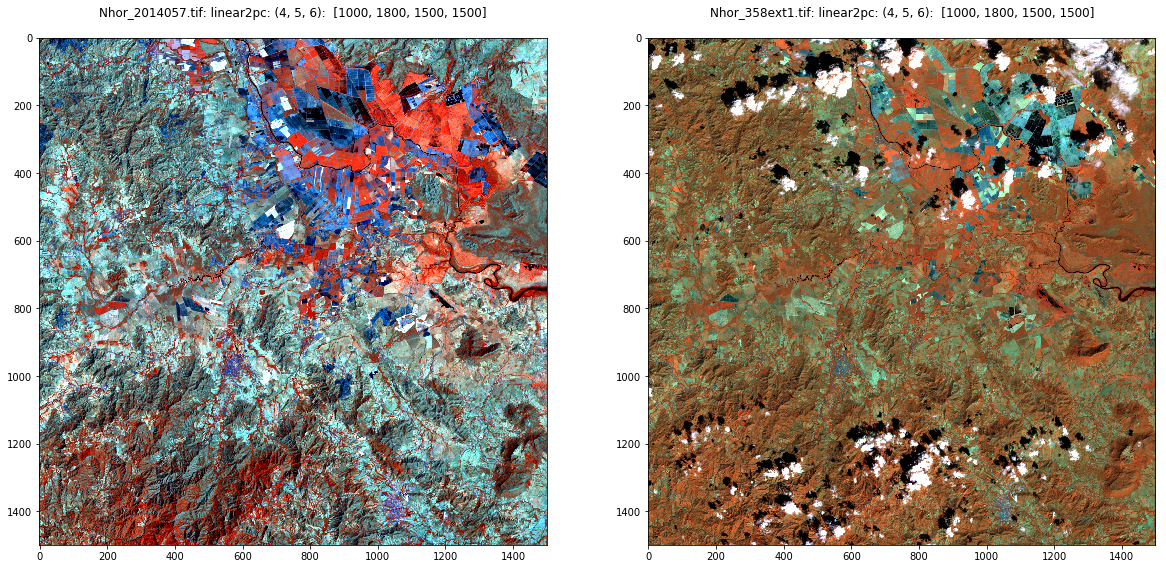

In [11]:
run scripts/dispms -f myimagery/Nhor_2014057.tif -d [1000,1800,1500,1500] -e 3 -p [4,5,6] \
-F myimagery/Nhor_358ext1.tif -D [1000,1800,1500,1500] -E 3 -P [4,5,6]

In [15]:
run scripts/iMad -h


Usage:
------------------------------------------------
Run the iterated MAD algorithm on two multispectral images   

python scripts/iMad.py [OPTIONS] filename1 filename2
    
Options:

   -h           this help
   -i  <int>    maximum iterations (default 50)
   -d  <list>   spatial subset list e.g. -d [0,0,500,500]
   -p  <list>   band positions list e.g. -p [1,2,3]
   -l  <float>  regularization (default 0)
   -n           suppress graphics
   -c           append canonical variates to output
    
    
The output MAD variate file is has the same format
as filename1 and is named

      path/MAD(filebasename1-filebasename2).ext1
      
where filename1 = path/filebasename1.ext1
      filename2 = path/filebasename2.ext2

For ENVI files, ext1 or ext2 is the empty string.       
-----------------------------------------------------


### IR-MAD seems to converge, but the maximum correlation (0.967) is rather low

------------IRMAD -------------
Thu Oct  4 09:42:09 2018
first scene:  myimagery/Nhor_2014057.tif
second scene: myimagery/Nhor_358ext1.tif
rho: [0.96771586 0.92705715 0.873106   0.81209242 0.75283384 0.64916795]
result written to: myimagery/MAD(Nhor_2014057-Nhor_358ext1).tif
elapsed time: 58.4136800766


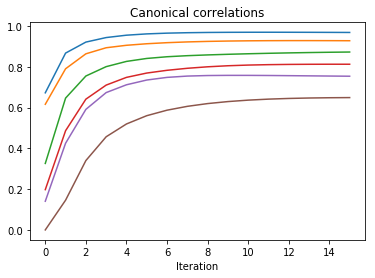

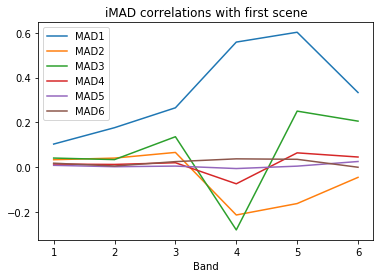

In [12]:
run scripts/iMad -d [1000,1800,1500,1500] -i 80 myimagery/Nhor_2014057.tif myimagery/Nhor_358ext1.tif

In [16]:
run scripts/radcal -h


Usage:
------------------------------------------------
Automatic radiometric normalization 
    
python scripts/radcal.py [OPTIONS] iMadFile [fullSceneFile]
    
Options:

   -h           this help
   -t  <float>  P-value threshold
   -d  <list>   spatial subset e.g. -d [0,0,500,500]
   -p  <list>   band positions  e.g. -d [1,2,3]
   
Spatial subset MUST match that of iMadFile
Spectral dimension of fullSceneFile, if present,
MUST match those of target and reference images

iMadFile is assumed to be of form path/MAD(filename1-filename2).ext 
and the output file is named 

         path/filename2_norm.ext.

That is, it is assumed that filename1 is reference and
filename2 is target and the output retains the format
of the imMadFile. A similar convention is used to
name the normalized full scene, if present:

         fullSceneFile_norm.ext

Note that, for ENVI format, ext is the empty string.
   
-------------------------------------------------------


### Even with a high no-change threshold (0.99) the normalization fails (P-values mostly zero)

Thu Oct  4 09:44:20 2018
reference: myimagery/Nhor_2014057.tif
target   : myimagery/Nhor_358ext1.tif
P-value threshold: 0.99
no-change pixels for training: 482, for testing: 241
band   slope    intercept  correlation P(t-test)  P(F-test)
 1   0.023495   0.082588   0.245910   0.048690   0.000000
 2   0.068169   0.048637   0.382299   0.065061   0.000000
 3   0.099483   0.030380   0.385413   0.115384   0.000000
 4   0.495996   0.007621   0.793465   0.619977   0.207311
 5   0.684529   0.002225   0.706099   0.638837   0.324685
 6   0.428617   0.007437   0.558821   0.404583   0.000137


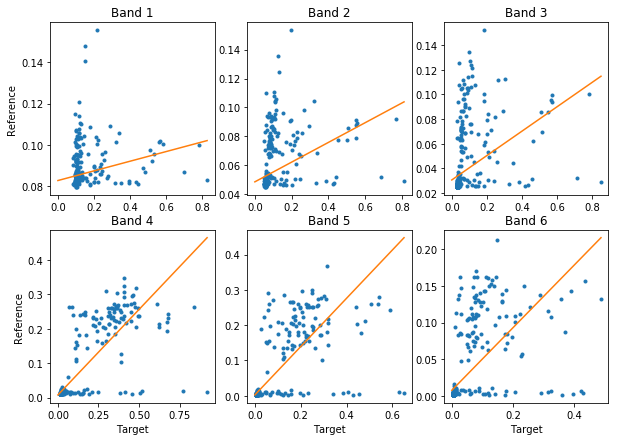

result written to: myimagery/Nhor_358ext1_norm
elapsed time: 1.2229411602


In [14]:
run scripts/radcal -t 0.99 myimagery/MAD(Nhor_2014057-Nhor_358ext1).tif